In [32]:
import sys
sys.path.append('../')
from matplotlib import pyplot as plt
from evolution import Evolver
from tqdm import tqdm


In [33]:
non_point_mutations = {'+' : 0.8,    #single residue insertion
                       '-' : 1,    #single residue deletion
                       '*' : 0.1,    #partial duplication
                       '/' : 0.1,    #random insertion 
                       '%' : 0.5,    #partial deletion
                       'd' : 0.001  #full duplication    
                       } 


Evolver.non_point_mutations = non_point_mutations
evolver = Evolver('codonrates')

In [258]:
def ratetest(l):
    seq = "A" * l
    x = [len(seq)]
    for i in range(5000):
        seq = evolver.mutate(seq)[0]
        x.append(len(seq))
        if len(seq) < 7:
            #print(f'too short after {i} steps')
            break
    return x , len(x)

100%|██████████| 10000/10000 [00:48<00:00, 204.25it/s]


Text(0.5, 0, 'Number of cycles')

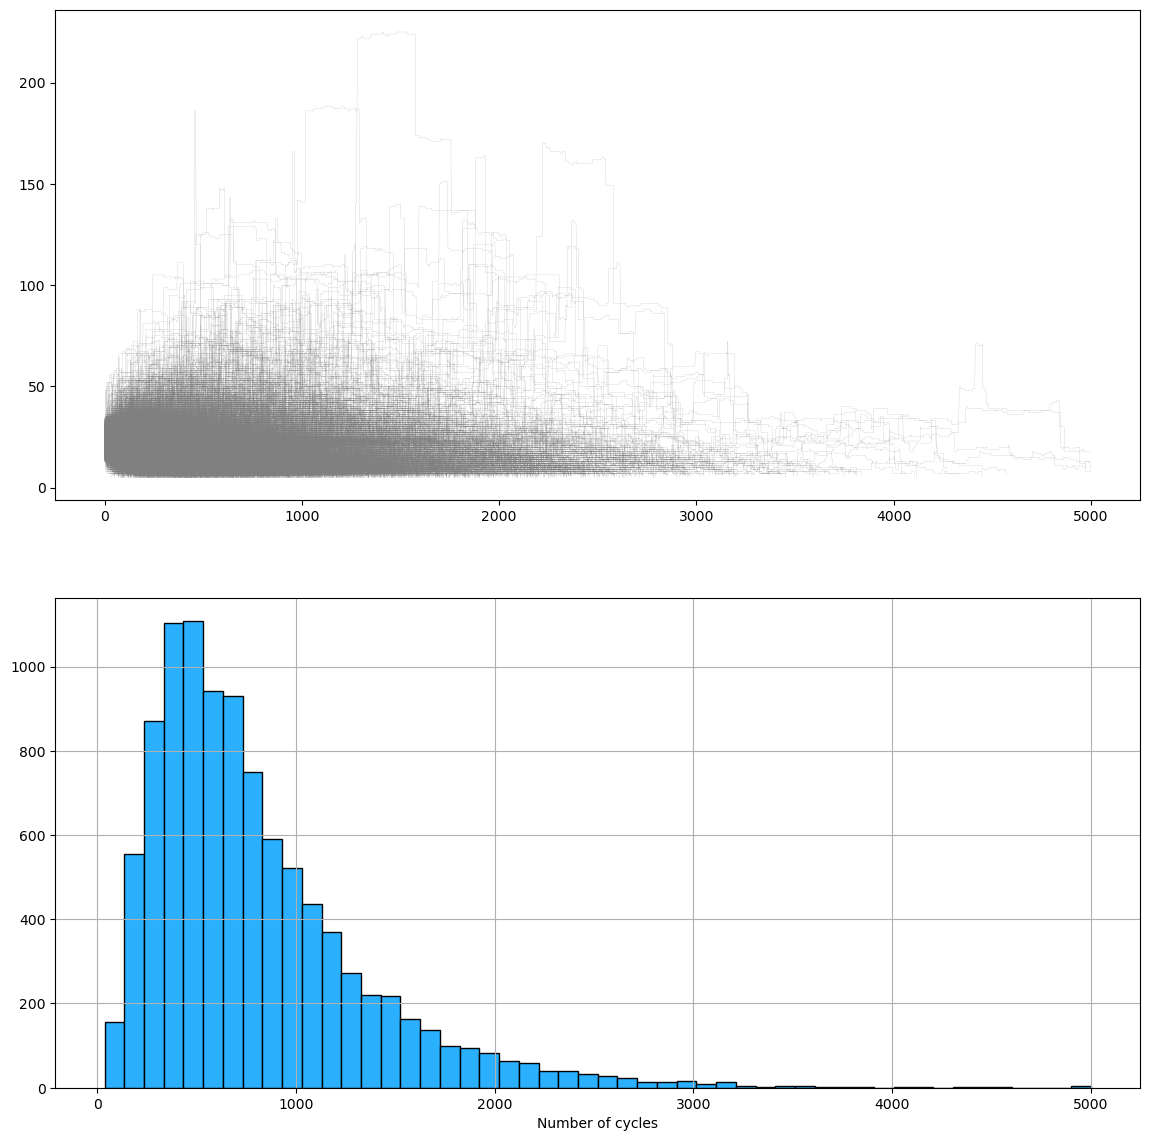

In [264]:
lengths = []
xs = []
fig, ax = plt.subplots(2)
fig.set_size_inches(14, 14)

for i in tqdm(range(10000)):
    x, len_x = ratetest(24)
    lengths.append(len_x)
    xs.append(x)
    ax[0].plot(x, '-', color='grey', linewidth=0.1)
    plt.grid(True, which="both")
#ax[0].set_ylim([0,100])
ax[1].hist(lengths, bins=50, facecolor = '#2ab0ff', edgecolor='black', linewidth=1)
plt.xlabel('Number of cycles')


In [34]:
import pandas as pd
import sys
sys.path.append('../')
from evolution import Evolver

evolver = Evolver('codonrates')
df = pd.DataFrame({'sequence':['A1','A2','A3','A4','A5'] , 'score': [10] * 5})
df2 = pd.DataFrame({'sequence':['B'] * 5, 'score': [5] * 5})





In [ ]:
evolver.select(df, df2, 5, selection_mode='weak', norepeat=True)

In [43]:
df.sample(6,replace=(not False))

,sequence,score
3,A4,10
1,A2,10
0,A1,10
0,A1,10
2,A3,10
2,A3,10
